In [1]:
%pylab inline
import scipy
from scipy import misc
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


In [2]:
face = misc.face()

In [3]:
print(face)
print(face.shape, face.dtype)

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ..., 
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ..., 
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ..., 
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ..., 
 [[ 87 106  76]
  [ 94 110  81]
  [107 124  92]
  ..., 
  [120 158  97]
  [119 157  96]
  [119 158  95]]

 [[ 85 101  72]
  [ 95 111  82]
  [112 127  96]
  ..., 
  [121 157  96]
  [120 156  94]
  [120 156  94]]

 [[ 85 101  74]
  [ 97 113  84]
  [111 126  97]
  ..., 
  [120 156  95]
  [119 155  93]
  [118 154  92]]]
(768, 1024, 3) uint8


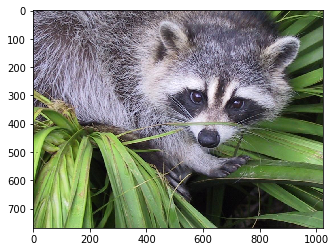

In [4]:
plt.imshow(face)

In [5]:
misc.imsave('face.png', face)

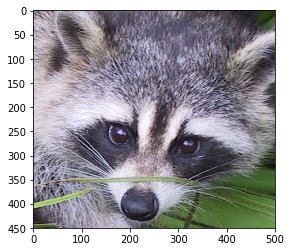

In [6]:
lx, ly = face.shape[0:2]
# Cropping
crop_face = face[50:500,400:900, :]
plt.imshow(crop_face)

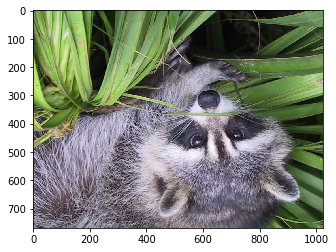

In [7]:
# Flip up - down
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face)

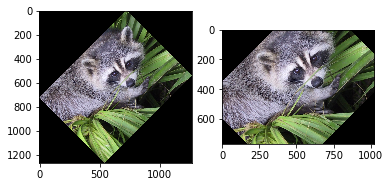

In [8]:
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.subplot(121)
plt.imshow(rotate_face)
plt.subplot(122)
plt.imshow(rotate_face_noreshape)

(-0.5, 1023.5, 767.5, -0.5)

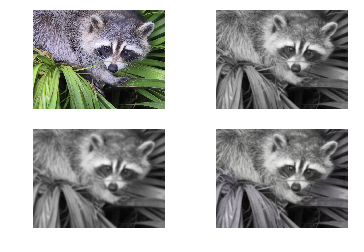

In [9]:
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred_face = ndimage.gaussian_filter(face, sigma=5)
local_mean_face = ndimage.uniform_filter(face, size=11)

plt.subplot(221)
plt.imshow(face)
plt.axis('off')
plt.subplot(222)
plt.imshow(blurred_face)
plt.axis('off')
plt.subplot(223)
plt.imshow(very_blurred_face)
plt.axis('off')
plt.subplot(224)
plt.imshow(local_mean_face)
plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

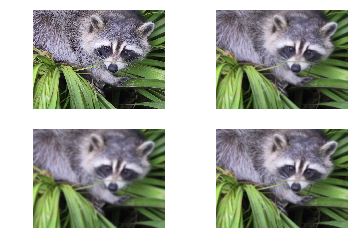

In [10]:
blurred_face = ndimage.gaussian_filter(face, sigma=(3, 3, 0))
very_blurred_face = ndimage.gaussian_filter(face, sigma=(5, 5, 0))
local_mean_face = ndimage.uniform_filter(face, size=(11, 11, 0))

plt.subplot(221)
plt.imshow(face)
plt.axis('off')
plt.subplot(222)
plt.imshow(blurred_face)
plt.axis('off')
plt.subplot(223)
plt.imshow(very_blurred_face)
plt.axis('off')
plt.subplot(224)
plt.imshow(local_mean_face)
plt.axis('off')

In [11]:
from skimage import feature

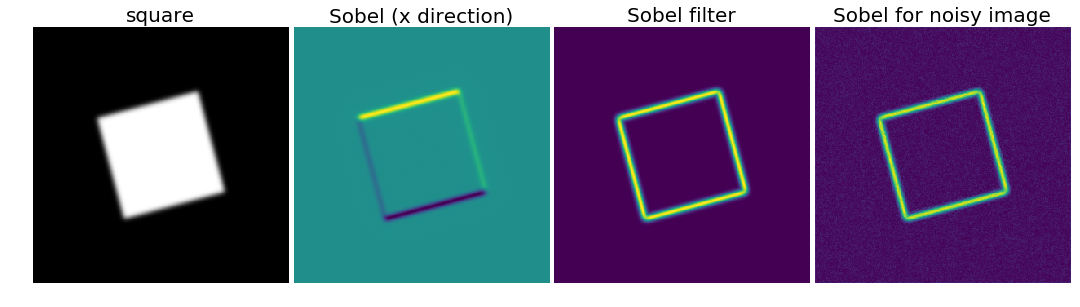

In [12]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 2

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 3)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im_noisy = im + 0.07*np.random.random(im.shape)

sx = ndimage.sobel(im_noisy, axis=0, mode='constant')
sy = ndimage.sobel(im_noisy, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

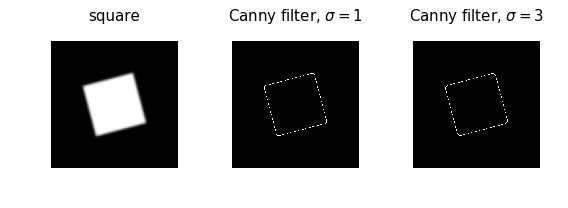

In [13]:
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('square', fontsize=15)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=15)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=15)

fig.tight_layout()

plt.show()

In [14]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)

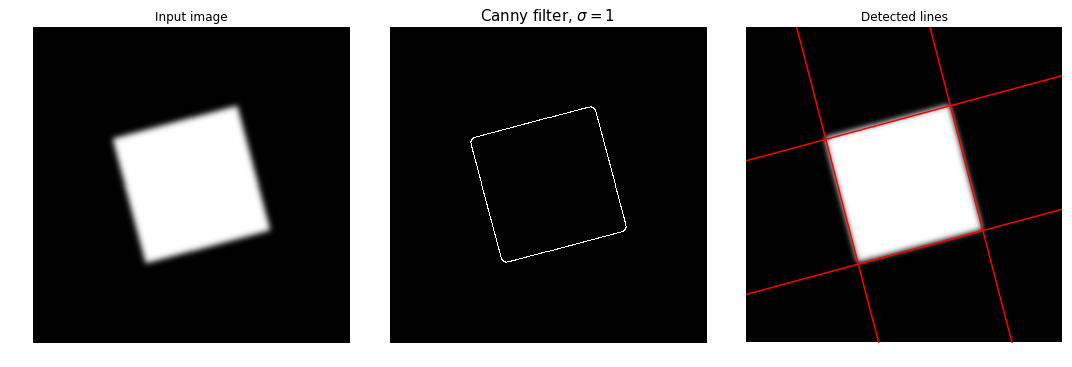

In [15]:
h, theta, d = hough_line(edges1)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(im, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(edges1, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Canny filter, $\sigma=1$', fontsize=15)

ax[2].imshow(im, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - im.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, im.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, im.shape[1]))
ax[2].set_ylim((im.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')
plt.tight_layout()
plt.show()

Ahora es momento de que ustedes trabajen un poco.  

Hace varios años trabajé en un proyecto donde se deseaba reconocer vesículas lipídicas en imágenes como las mostradas en la siguiente figura. El objetivo era encontrar para cada vesícula su tamaño (diámetro) y la posición de su centroide.  
Implemente un algoritmo basado en un filtro Canny y una transformada de Hough para solucionar el problema planteado.  

Le recomiendo revisar la función hough_circle documentada [acá](http://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html).  

Evalue el desempeño del algoritmos utilizando, previo al filtro Canny, algunos filtros para reducir el ruido de la imagen.  

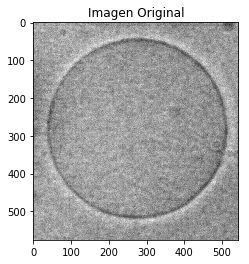

In [16]:
Im1 = pylab.imread("ves_full_150_002.jpg")
#print imagen
pylab.imshow(Im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
pylab.gray()
gris= Im1[:,:,0]

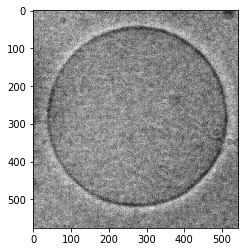

In [17]:
plt.imshow(gris, cmap = plt.get_cmap('gray'))

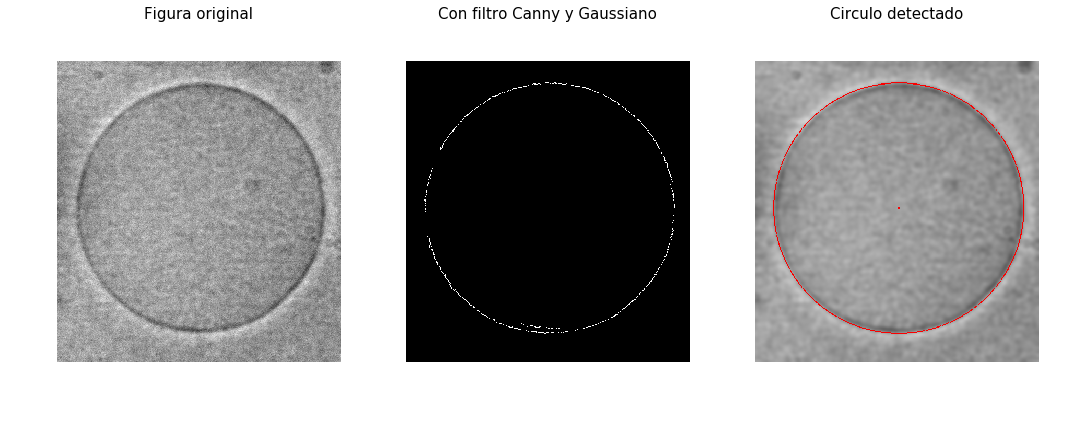

el circulo identifico tiene un diámetro de 478 pixeles y un centroide ubicado en las coordenadas x,y=(281,275)


In [37]:
from skimage.transform import (hough_circle, hough_circle_peaks)
from skimage.draw import circle_perimeter,circle
from skimage import data, color
# Compute the Canny filter for two values of sigma
grisfil = ndimage.gaussian_filter(gris, sigma=(3,3))
edges3 = feature.canny(grisfil, sigma=1)

hough_radii = np.arange(200,300, 1)
hough_res = hough_circle(edges3, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=1)
griscol = color.gray2rgb(grisfil)


grosor=1
vector=(np.linspace(0,grosor,grosor+1)).astype(int)
for i in vector:
 coory, coorx = circle_perimeter(cy[0],cx[0],radii[0]+i)
 griscol[coory, coorx] = (250, 0, 0)

coory, coorx = circle(cy[0],cx[0],3)
griscol[coory, coorx] = (250, 0, 0)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6),sharex=True, sharey=True)

ax1.imshow(Im1, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Figura original', fontsize=15)

ax2.imshow(edges3, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Con filtro Canny y Gaussiano', fontsize=15)

ax3.imshow(griscol, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Circulo detectado', fontsize=15)

fig.tight_layout()

plt.show()

print("el circulo identifico tiene un diámetro de %d pixeles y un centroide ubicado en las coordenadas x,y=(%d,%d)" %(2*radii[0],cy[0],cx[0]))
